觀察: 科技股/AI 跳多 => 必定向上; 跳空: 幾乎向下，隔天反漲
!!!! 要有整理一天的概念

Buy and hold:  1.8489154468920024
Non comp return:  4.912999999999989


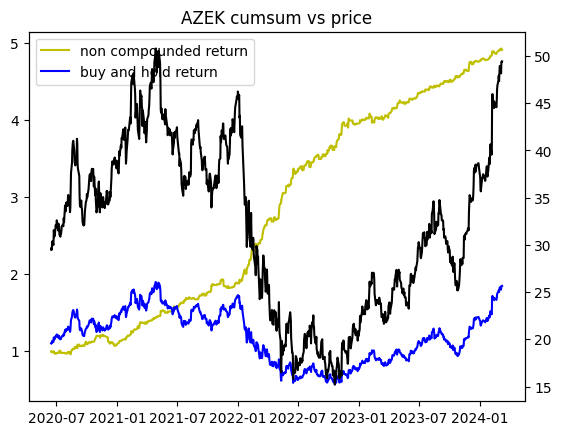

AZEK
total strong buy trend days:  18
total reverse sell days:  256
total reverse buy days:  214
total strong sell trend days:  18
-------------------------------
total trading days:  940
total win days:  325
total lose days:  173
total no-action days:  442
winrate:  65.26 %
Buy and hold:  2.265791435723179
Non comp return:  5.5789999999999775


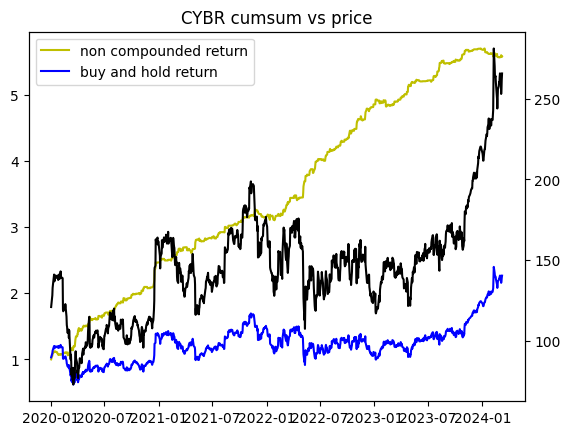

CYBR
total strong buy trend days:  16
total reverse sell days:  286
total reverse buy days:  223
total strong sell trend days:  8
-------------------------------
total trading days:  1052
total win days:  325
total lose days:  194
total no-action days:  533
winrate:  62.62 %
Buy and hold:  3.3793055917088233
Non comp return:  5.287999999999983


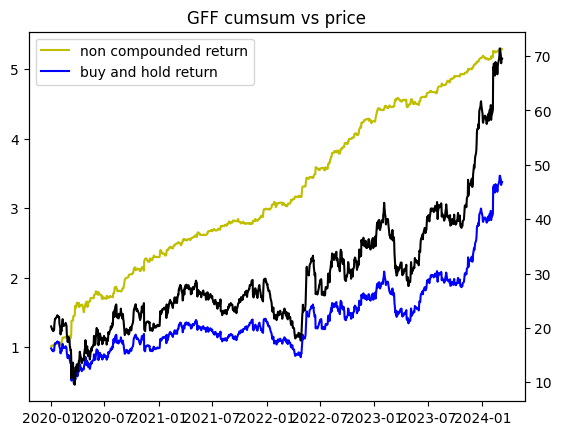

GFF
total strong buy trend days:  20
total reverse sell days:  309
total reverse buy days:  234
total strong sell trend days:  17
-------------------------------
total trading days:  1052
total win days:  345
total lose days:  220
total no-action days:  487
winrate:  61.06 %
Buy and hold:  3.413793103448276
Non comp return:  3.838999999999978


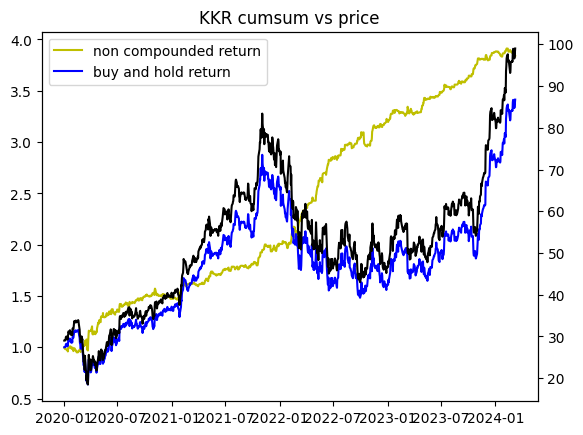

KKR
total strong buy trend days:  34
total reverse sell days:  340
total reverse buy days:  243
total strong sell trend days:  31
-------------------------------
total trading days:  1052
total win days:  374
total lose days:  259
total no-action days:  419
winrate:  59.08 %
Buy and hold:  1.520042976084697
Non comp return:  4.66499999999998


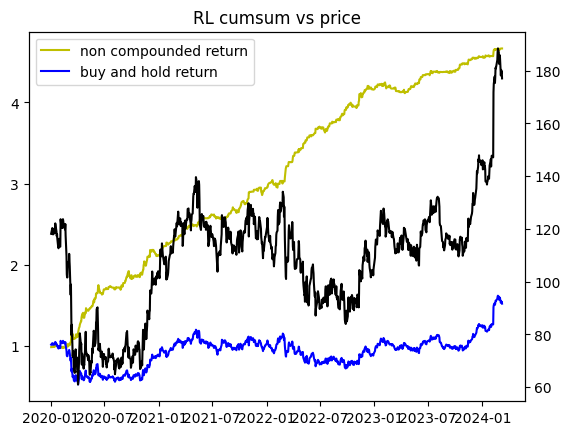

RL
total strong buy trend days:  21
total reverse sell days:  294
total reverse buy days:  257
total strong sell trend days:  25
-------------------------------
total trading days:  1052
total win days:  370
total lose days:  211
total no-action days:  471
winrate:  63.68 %
Buy and hold:  1.2052899625991618
Non comp return:  3.533999999999984


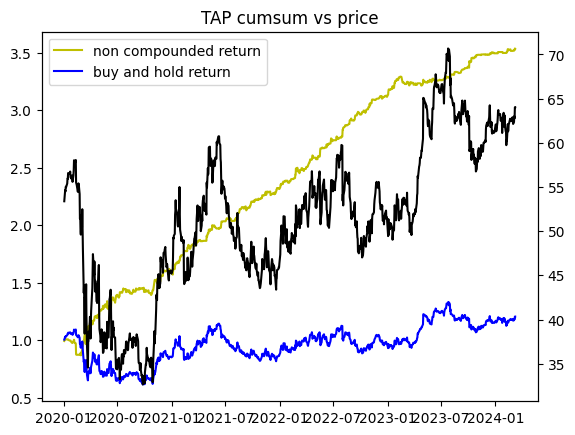

TAP
total strong buy trend days:  13
total reverse sell days:  295
total reverse buy days:  246
total strong sell trend days:  13
-------------------------------
total trading days:  1052
total win days:  338
total lose days:  210
total no-action days:  504
winrate:  61.68 %
Buy and hold:  2.2383833730316325
Non comp return:  3.451999999999982


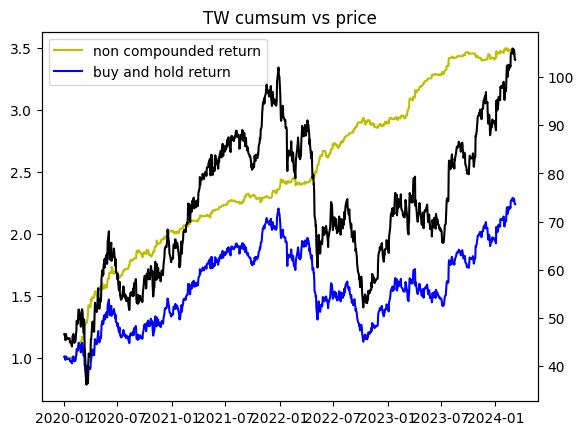

TW
total strong buy trend days:  10
total reverse sell days:  297
total reverse buy days:  226
total strong sell trend days:  5
-------------------------------
total trading days:  1052
total win days:  321
total lose days:  191
total no-action days:  540
winrate:  62.7 %
Buy and hold:  0.8129921231756755
Non comp return:  1.811999999999986


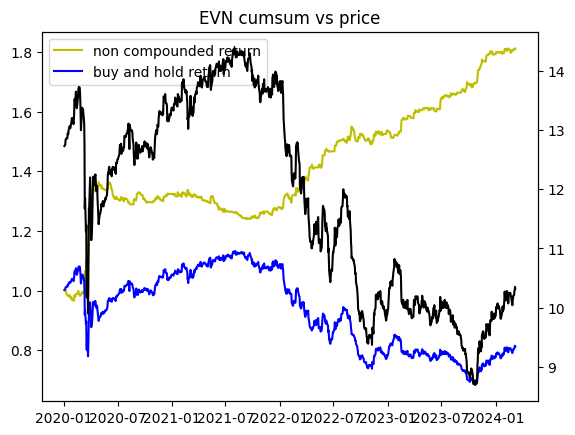

EVN
total strong buy trend days:  21
total reverse sell days:  282
total reverse buy days:  234
total strong sell trend days:  9
-------------------------------
total trading days:  1052
total win days:  252
total lose days:  251
total no-action days:  549
winrate:  50.1 %
Buy and hold:  0.36295971569482355
Non comp return:  7.747999999999975


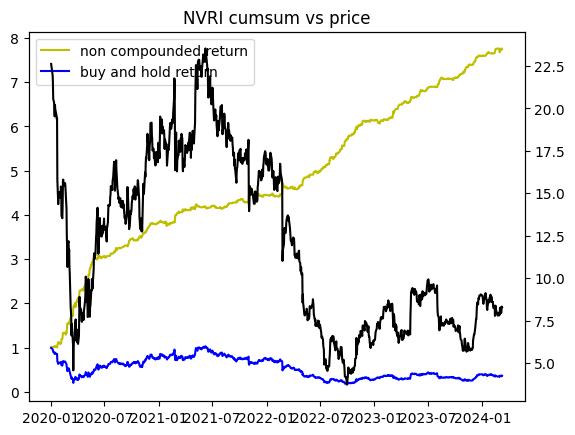

NVRI
total strong buy trend days:  16
total reverse sell days:  269
total reverse buy days:  287
total strong sell trend days:  15
-------------------------------
total trading days:  1052
total win days:  368
total lose days:  210
total no-action days:  474
winrate:  63.67 %


In [22]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
def cdp_backtest(show_table=False, ticker='NVDA', debug=True, show_backtest = True, fee=0.05, start="2023-01-01", hold_time = 0):
    a = yf.download(ticker, start=start, interval='1d', progress=False)

    # data cleaning
    a['typical'] = (a['Close']*2 + a['High'] + a['Low'])/4
    a['typical'] = a['typical'].shift(1)
    a['PT'] = (a['High'] - a['Low'])
    a["AH"] = a['typical'] + a['PT']
    a['NH'] = a['typical']*2 - a['Low']
    a['NL'] = a['typical']*2 - a['High']
    a["AL"] = a['typical'] - a['PT']
    # a['typical'] = a['typical'].shift(1)
    a.dropna(inplace=True)

    # get signal
    open = list(a['Open'])
    close = list(a['Close'])
    high = list(a['High'])
    low = list(a['Low'])
    typical = list(a['typical'])
    ah = list(a['AH'])
    nh = list(a['NH'])
    nl = list(a['NL'])
    al = list(a['AL'])
    comment = []
    signal = []
    max_dwardown = []
    for i in range(len(a)):
        if(open[i] > ah[i]):
            comment.append("trend buy")
            signal.append(4)
        elif(ah[i] > open[i] > nh[i]):
            comment.append("reverse sell")
            signal.append(3)
        elif(nh[i] > open[i] > nl[i]):
            comment.append("nothing")
            signal.append(2)
        elif(nl[i] > open[i] > al[i]):
            comment.append("reverse buy")
            signal.append(1)
        elif(al[i] > open[i]):
            comment.append("trend sell")
            signal.append(0)
        else:
            comment.append("error")
            signal.append(-1)
    a['signal'] = signal
    a['comment'] = comment

    # calculate backtest result v.s. buy and hold return
    signals = list(a['signal'])
    profits = []
    buy_and_hold = []
    if hold_time == 1:
        for i in range(len(a)):
            # calculate buy-and-hold return graph
            buy_and_hold.append(close[i]/open[0])
            # trend buy and reverse sell => buy
            if(signals[i] == 3 or signals[i] == 4):
                mdd = (low[i] - open[i])/open[i]
                profit = (1 + (close[i] - open[i])/open[i])*(1-fee)
            # trend sell and reverse buy => sell
            elif(signals[i] == 0 or signals[i] == 1):
                # sell
                mdd = (open[i] - high[i])/open[i]
                profit = (1 + (open[i] - close[i])/open[i])*(1-fee)
            
            elif(signals[i] == 2 or signals[i] == -1):
                #do nothing
                profit = 1
                mdd = 0
            max_dwardown.append(np.round(mdd, 3))
            profits.append(np.round(profit, 3))
    elif hold_time == 0:
        for i in range(len(a)):
            # calculate buy-and-hold return graph
            buy_and_hold.append(close[i]/open[0])
            # trend buy and reverse sell => buy
            if(signals[i] == 0 or signals[i] == 1):
                mdd = (low[i] - open[i])/open[i]
                profit = (1 + (open[i+1] - open[i])/open[i])*(1-fee)
            # trend sell and reverse buy => sell
            elif(signals[i] == 3 or signals[i] == 4):
                # sell
                mdd = (open[i] - high[i])/open[i]
                profit = (1 + (open[i] - open[i+1])/open[i])*(1-fee)
            
            elif(signals[i] == 2 or signals[i] == -1):
                #do nothing
                profit = 1
                mdd = 0
            max_dwardown.append(np.round(mdd, 3))
            profits.append(np.round(profit, 3))
        # elif(signals[i] == 3):
        #     #buy

        # elif(signals[i] == 4):
        #     # sell
        #     mdd = (open[i] - high[i])/open[i]
        #     profit = (1 + (open[i] - close[i])/open[i])*(1-fee)

    result = np.cumsum(np.log(profits))
    for i in range(len(result)):
        result[i] = result[i] + 1
    a['result'] = result
    a['daily_profit'] = profits
    a['buy_and_hold'] = buy_and_hold
    a['mdd'] = max_dwardown
    #debug
    res_db = a[["Open", "Close", "High", "comment", "daily_profit", "mdd"]]
    if debug == True and show_table == True:
        
        print(res_db[res_db['comment'] != "nothing"].tail(20))

    # calculation for compounded return & non-compounded return
    comp_return = []
    non_comp_return = []
    return_comprod = 1.0
    return_non_comp = 1.0
    for i in list(a['daily_profit']):
        return_comprod *= i
        return_non_comp += (i - 1)
        comp_return.append(return_comprod)
        non_comp_return.append(return_non_comp)
    a['comp_ret'] = comp_return
    a['non_comp_ret'] = non_comp_return
    print("Buy and hold: ", list(a['buy_and_hold'])[-1])
    print("Non comp return: ", list(a['non_comp_ret'])[-1])
    if debug != True:
        # plotting
        fig, ax = plt.subplots()
        # ax.plot(a['comp_ret'], label='compounded return', color='r')
        ax.plot(a['non_comp_ret'], label='non compounded return', color='y')
        
        # 雖然圖線重疊，但這樣刻度才對
        ax.plot(a['buy_and_hold'], label='buy and hold return', color = 'blue')
        ax2 = ax.twinx()
        ax2.plot(a['Close'], label='close', color='black')
        ax.legend()
        plt.title(f"{ticker} cumsum vs price")
        plt.show()
    print(ticker)
    # show backtest results
    win = a[a['daily_profit'] > 1]
    lose = a[a['daily_profit'] < 1]
    nothing = a[a['daily_profit'] == 1]
    if show_backtest == True:
        if (len(nothing)+len(lose)+len(win) != len(a)):
            print("win-lose-nothing classification incorrect")
        print("===============================")
        print("total strong buy trend days: ", len(a[a['comment'] == "trend buy"])) 
        print("total reverse sell days: ", len(a[a['comment'] == "reverse sell"]))
        print("total reverse buy days: ", len(a[a['comment'] == "reverse buy"]))
        print("total strong sell trend days: ", len(a[a['comment'] == "trend sell"]))   
        print("-------------------------------")
        print("total trading days: ", len(a))
        print("total win days: ", len(win))
        print("total lose days: ", len(lose))
        print("total no-action days: ", len(nothing))

    print("winrate: ", np.round(len(win)/(len(win) + len(lose))*100, 2), "%")
    print("===============================")
    return a
trend = ["NVDA", "AMD", "QCOM", "TSM", "COIN", "MSTR", "ARM"]
defensive = ['MCD', "C", "GS", "WBD", "NFLX"]
holding = ["AZEK", "CYBR", "GFF", "KKR", "RL", "TAP", "TW", "EVN", "NVRI"]
custom = ['6799.TW', "2330.TW", "4908.TWO"]
for tick in holding:
    a = cdp_backtest(show_table = False, ticker=tick, debug=False, show_backtest=True, fee=0.002, start = "2020-01-01", hold_time = 1)
# C GS WBD NFLX
# no env ["AZEK", "CYBR", "GFF", "KKR", "RL", "TAP", "TW", "EVN", "NVRI"]

Buy and hold:  1.2386959225651173
Non comp return:  1.1039999999999996


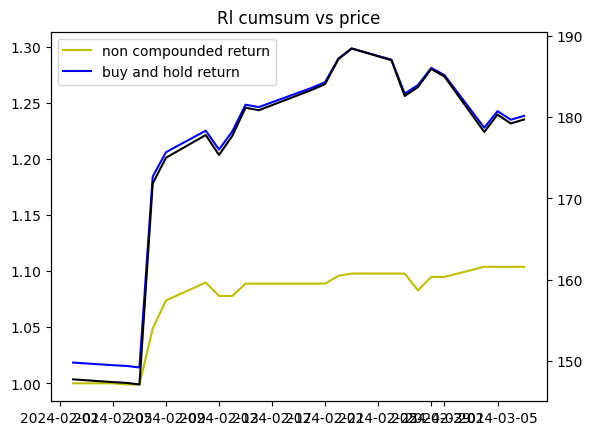

Rl
total strong buy trend days:  1
total reverse sell days:  7
total reverse buy days:  2
total strong sell trend days:  1
-------------------------------
total trading days:  24
total win days:  8
total lose days:  3
total no-action days:  13
winrate:  72.73 %
1


,Open,High,Low,Close,Adj Close,Volume,typical,PT,AH,NH,NL,AL,signal,comment,result,daily_profit,buy_and_hold,mdd,comp_ret,non_comp_ret
Date,,,,,,,,,,,,,,,,,,,,
2024-02-02,145.080002,147.990005,143.270004,147.770004,147.770004,925700,145.770000,4.720001,150.490002,148.269997,143.549995,141.049999,2,nothing,1.000000,1.000,1.018542,0.000,1.000000,1.000
2024-02-05,147.029999,147.529999,144.850006,147.429993,147.429993,602300,146.700005,2.679993,149.379997,148.550003,145.870010,144.020012,2,nothing,1.000000,1.000,1.016198,0.000,1.000000,1.000
2024-02-06,147.399994,148.839996,146.330002,147.339996,147.339996,933600,146.809998,2.509995,149.319992,147.289993,144.779999,144.300003,3,reverse sell,0.998999,0.999,1.015578,-0.007,0.999000,0.999
2024-02-07,147.649994,148.000000,146.000000,147.139999,147.139999,1170900,147.462498,2.000000,149.462498,148.924995,146.924995,145.462498,2,nothing,0.998999,1.000,1.014199,0.000,0.999000,0.999
2024-02-08,163.570007,173.940002,161.320007,171.850006,171.850006,4428100,147.070000,12.619995,159.689995,132.819992,120.199997,134.450005,4,trend buy,1.047790,1.050,1.184519,-0.014,1.048950,1.049
2024-02-09,170.550003,175.399994,169.600006,175.009995,175.009995,1760000,169.740005,5.799988,175.539993,169.880005,164.080017,163.940018,3,reverse sell,1.072482,1.025,1.206300,-0.006,1.075174,1.074
2024-02-12,174.820007,178.320007,173.869995,177.800003,177.800003,1408300,173.754997,4.450012,178.205009,173.639999,169.189987,169.304985,3,reverse sell,1.088356,1.016,1.225531,-0.005,1.092377,1.090
2024-02-13,173.419998,175.619995,171.850006,175.350006,175.350006,1357100,176.947502,3.769989,180.717491,182.044998,178.275009,173.177513,1,reverse buy,1.076283,0.988,1.208644,-0.013,1.079268,1.078
2024-02-14,177.289993,177.750000,171.380005,177.699997,177.699997,1093800,174.542503,6.369995,180.912498,177.705002,171.335007,168.172508,2,nothing,1.076283,1.000,1.224841,0.000,1.079268,1.078


In [212]:
a = cdp_backtest(show_table = False, ticker="RL", debug=False, show_backtest=True, fee=0.001, start='2024-02-01', hold_time=1)
# reverse cdp => trend buy, reverse buy = sell, reverse sell, trend sell = buy
print(len(a[a["comment"] == "trend buy"]))
trend_buy = a[a["comment"] == "trend buy"]
# trend_buy[['Open', "Close"]]
a[a['daily_profit'] > 1].head(25)
a

Buy and hold:  1.5992670654926715
Non comp return:  3.4799999999999844


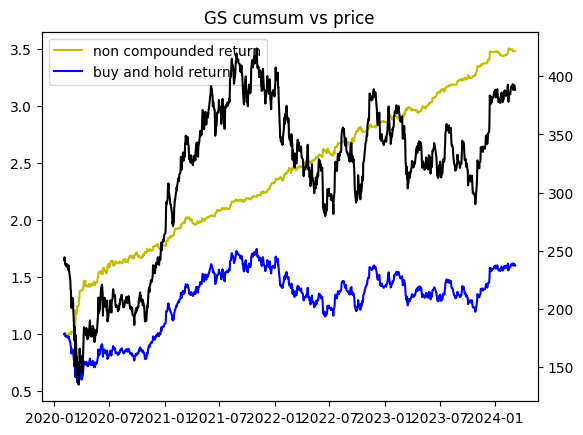

GS
total strong buy trend days:  33
total reverse sell days:  286
total reverse buy days:  245
total strong sell trend days:  37
-------------------------------
total trading days:  1030
total win days:  356
total lose days:  221
total no-action days:  453
winrate:  61.7 %
33


,Open,High,Low,Close,Adj Close,Volume,typical,PT,AH,NH,NL,AL,signal,comment,result,daily_profit,buy_and_hold,mdd,comp_ret,non_comp_ret
Date,,,,,,,,,,,,,,,,,,,,
2020-02-04,242.880005,243.740005,241.550003,241.940002,217.714264,3052500,239.614998,2.190002,241.805000,237.679993,235.489990,237.424995,4,trend buy,0.994987,0.995,0.996130,-0.005,0.995000,0.995
2020-02-05,244.990005,245.130005,243.000000,244.300003,219.838013,3126600,242.292503,2.130005,244.422508,241.585007,239.455002,240.162498,4,trend buy,0.990979,0.996,1.005847,-0.008,0.991020,0.991
2020-02-06,245.350006,245.770004,241.179993,241.820007,217.606308,2225600,244.182503,4.590012,248.772514,247.185013,242.595001,239.592491,2,nothing,0.990979,1.000,0.995636,0.000,0.991020,0.991
2020-02-07,239.750000,240.520004,236.550003,238.000000,214.168823,3006500,242.647503,3.970001,246.617504,248.745003,244.775002,238.677502,1,reverse buy,0.996962,1.006,0.979908,-0.003,0.996966,0.997
2020-02-10,237.399994,237.869995,235.460007,237.360001,213.592926,2591300,238.267502,2.409988,240.677490,241.074997,238.665009,235.857513,1,reverse buy,0.995961,0.999,0.977273,-0.002,0.995969,0.996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,389.630005,391.040009,385.250000,388.100006,388.100006,1697700,389.937500,5.790009,395.727509,394.625000,388.834991,384.147491,2,nothing,3.412157,1.000,1.597908,0.000,11.158007,3.480
2024-03-04,388.809998,396.570007,386.200012,392.250000,392.250000,1955100,388.122505,10.369995,398.492500,390.044998,379.675003,377.752510,2,nothing,3.412157,1.000,1.614995,0.000,11.158007,3.480
2024-03-05,390.720001,397.489990,390.309998,390.910004,390.910004,2697800,391.817505,7.179993,398.997498,393.325012,386.145020,384.637512,2,nothing,3.412157,1.000,1.609478,0.000,11.158007,3.480


In [200]:
# signal version
a = cdp_backtest(show_table = False, ticker="GS", debug=False, show_backtest=True, fee=0.001, start='2020-02-01', hold_time=1)
# reverse cdp => trend buy, reverse buy = sell, reverse sell, trend sell = buy
print(len(a[a["comment"] == "trend buy"]))
trend_buy = a[a["comment"] == "trend buy"]
# trend_buy[['Open', "Close"]]
a[a['daily_profit'] > 1].head(25)
a

In [181]:
# daily decision version
def calculate_cdp_for_the_day(ticker):
    a = yf.download(ticker, start="2024-02-28", interval='1d', progress=False)
    a['typical'] = (a['Close']*2 + a['High'] + a['Low'])/4
    a['typical'] = a['typical']
    a['PT'] = (a['High'] - a['Low'])
    a["AH"] = a['typical'] + a['PT']
    a['NH'] = a['typical']*2 - a['Low']
    a['NL'] = a['typical']*2 - a['High']
    a["AL"] = a['typical'] - a['PT']
    # a['typical'] = a['typical'].shift(1)
    # a.dropna(inplace=True)
    return a
for ticker in ['TSM', "QCOM", "MU", "NVDA", "AMD"]:
    s = calculate_cdp_for_the_day(ticker=ticker)
    print(ticker)    
    print(s[['AH', "NH", "NL", "AL", "Close"]].tail(1))

TSM
                    AH          NH          NL          AL       Close
Date                                                                  
2024-03-07  155.987511  152.925003  145.474991  141.087486  149.199997
QCOM
                    AH          NH          NL          AL       Close
Date                                                                  
2024-03-07  182.775002  179.800003  171.639999  166.454994  175.720001
MU
                    AH          NH         NL         AL      Close
Date                                                               
2024-03-07  101.000004  100.090004  97.870003  96.560001  98.980003
NVDA
                    AH          NH          NL          AL       Close
Date                                                                  
2024-03-07  950.917465  942.514984  910.865021  887.617538  926.690002
AMD
                    AH          NH          NL          AL       Close
Date                                                             

In [115]:
# show version
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
ticker = "NVDA"
a = yf.download(ticker, start="2023-01-01", interval='1d', progress=False)
a['typical'] = (a['Close']*2 + a['High'] + a['Low'])/4
a['typical'] = a['typical'].shift(1)
a['PT'] = (a['High'] - a['Low'])
a["AH"] = a['typical'] + a['PT']
a['NH'] = a['typical']*2 - a['Low']
a['NL'] = a['typical']*2 - a['High']
a["AL"] = a['typical'] - a['PT']
# a['typical'] = a['typical'].shift(1)
# a.dropna(inplace=True)
a.head()


In [ ]:
# looping-for-the-best-stocks version
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
def cdp_backtest(show_table=False, ticker='NVDA', debug=True, show_backtest = True, fee=0.05, start="2023-01-01", hold_time = 0):
    a = yf.download(ticker, start=start, interval='1d', progress=False)

    # data cleaning
    a['typical'] = (a['Close']*2 + a['High'] + a['Low'])/4
    a['typical'] = a['typical'].shift(1)
    a['PT'] = (a['High'] - a['Low'])
    a["AH"] = a['typical'] + a['PT']
    a['NH'] = a['typical']*2 - a['Low']
    a['NL'] = a['typical']*2 - a['High']
    a["AL"] = a['typical'] - a['PT']
    # a['typical'] = a['typical'].shift(1)
    a.dropna(inplace=True)

    # get signal
    open = list(a['Open'])
    close = list(a['Close'])
    high = list(a['High'])
    low = list(a['Low'])
    typical = list(a['typical'])
    ah = list(a['AH'])
    nh = list(a['NH'])
    nl = list(a['NL'])
    al = list(a['AL'])
    comment = []
    signal = []
    max_dwardown = []
    for i in range(len(a)):
        if(open[i] > ah[i]):
            comment.append("trend buy")
            signal.append(4)
        elif(ah[i] > open[i] > nh[i]):
            comment.append("reverse sell")
            signal.append(3)
        elif(nh[i] > open[i] > nl[i]):
            comment.append("nothing")
            signal.append(2)
        elif(nl[i] > open[i] > al[i]):
            comment.append("reverse buy")
            signal.append(1)
        elif(al[i] > open[i]):
            comment.append("trend sell")
            signal.append(0)
        else:
            comment.append("error")
            signal.append(-1)
    a['signal'] = signal
    a['comment'] = comment

    # calculate backtest result v.s. buy and hold return
    signals = list(a['signal'])
    profits = []
    buy_and_hold = []
    if hold_time == 1:
        for i in range(len(a)):
            # calculate buy-and-hold return graph
            buy_and_hold.append(close[i]/open[0])
            # trend buy and reverse sell => buy
            if(signals[i] == 3 or signals[i] == 4):
                mdd = (low[i] - open[i])/open[i]
                profit = (1 + (close[i] - open[i])/open[i])*(1-fee)
            # trend sell and reverse buy => sell
            elif(signals[i] == 0 or signals[i] == 1):
                # sell
                mdd = (open[i] - high[i])/open[i]
                profit = (1 + (open[i] - close[i])/open[i])*(1-fee)
            
            elif(signals[i] == 2 or signals[i] == -1):
                #do nothing
                profit = 1
                mdd = 0
            max_dwardown.append(np.round(mdd, 3))
            profits.append(np.round(profit, 3))
    elif hold_time == 0:
        for i in range(len(a)):
            # calculate buy-and-hold return graph
            buy_and_hold.append(close[i]/open[0])
            # trend buy and reverse sell => buy
            if(signals[i] == 0 or signals[i] == 1):
                mdd = (low[i] - open[i])/open[i]
                profit = (1 + (open[i+1] - open[i])/open[i])*(1-fee)
            # trend sell and reverse buy => sell
            elif(signals[i] == 3 or signals[i] == 4):
                # sell
                mdd = (open[i] - high[i])/open[i]
                profit = (1 + (open[i] - open[i+1])/open[i])*(1-fee)
            
            elif(signals[i] == 2 or signals[i] == -1):
                #do nothing
                profit = 1
                mdd = 0
            max_dwardown.append(np.round(mdd, 3))
            profits.append(np.round(profit, 3))
        # elif(signals[i] == 3):
        #     #buy

        # elif(signals[i] == 4):
        #     # sell
        #     mdd = (open[i] - high[i])/open[i]
        #     profit = (1 + (open[i] - close[i])/open[i])*(1-fee)

    result = np.cumsum(np.log(profits))
    for i in range(len(result)):
        result[i] = result[i] + 1
    a['result'] = result
    a['daily_profit'] = profits
    a['buy_and_hold'] = buy_and_hold
    a['mdd'] = max_dwardown
    #debug
    res_db = a[["Open", "Close", "High", "comment", "daily_profit", "mdd"]]
    if debug == True and show_table == True:
        
        print(res_db[res_db['comment'] != "nothing"].tail(20))

    # calculation for compounded return & non-compounded return
    comp_return = []
    non_comp_return = []
    return_comprod = 1.0
    return_non_comp = 1.0
    for i in list(a['daily_profit']):
        return_comprod *= i
        return_non_comp += (i - 1)
        comp_return.append(return_comprod)
        non_comp_return.append(return_non_comp)
    a['comp_ret'] = comp_return
    a['non_comp_ret'] = non_comp_return
    four_year = a
    one_year = a.iloc[-296:-46, :]
    year_td = a.iloc[-46:, :]
    buy_hold_4y = 1
    buy_hold_1y = 1
    buy_hold_td = 1

    win_4y = a[a['daily_profit'] > 1]
    win_1y = one_year[one_year['daily_profit'] > 1]
    win_td = year_td[year_td['daily_profit'] > 1]
    
    lose_4y = a[a['daily_profit'] < 1]
    lose_1y = one_year[one_year['daily_profit'] < 1]
    lose_td = year_td[year_td['daily_profit'] < 1]
    
    win = a[a['daily_profit'] > 1]
    lose = a[a['daily_profit'] < 1]
    nothing = a[a['daily_profit'] == 1]


    win_rate_4y = np.round(len(win_4y)/(len(win_4y) + len(lose_4y))*100, 2)
    win_rate_1y = np.round(len(win_1y)/(len(win_1y) + len(lose_1y))*100, 2)
    win_rate_td = np.round(len(win_td)/(len(win_td) + len(lose_td))*100, 2)
    
    non_comp_4y = list(a['non_comp_ret'])[-1]
    non_comp_1y = list(one_year['non_comp_ret'])[-1]
    non_comp_td = list(year_td['non_comp_ret'])[-1]



    column_name = ["ticker", "winrate_4y", "return_4y", "buyhold_4y", "winrate_1y", "return_1y", "buyhold_1y", "winrate_td", "return_td", "buyhold_td"]
    rows = [ticker, win_rate_4y, list(a['non_comp_ret'])[-1], list(a.iloc[-296:-46, :]['non_comp_ret'])[-1], list(a.iloc[-46:, :]['non_comp_ret'])[-1]]


    
    # rows = []
    # if show_backtest == True:
    #     if (len(nothing)+len(lose)+len(win) != len(a)):
    #         print("win-lose-nothing classification incorrect")
    #     print("===============================")
    #     print("total strong buy trend days: ", len(a[a['comment'] == "trend buy"])) 
    #     print("total reverse sell days: ", len(a[a['comment'] == "reverse sell"]))
    #     print("total reverse buy days: ", len(a[a['comment'] == "reverse buy"]))
    #     print("total strong sell trend days: ", len(a[a['comment'] == "trend sell"]))   
    #     print("-------------------------------")
    #     print("total trading days: ", len(a))
    #     print("total win days: ", len(win))
    #     print("total lose days: ", len(lose))
    #     print("total no-action days: ", len(nothing))

    print("winrate: ", np.round(len(win)/(len(win) + len(lose))*100, 2), "%")
    print("===============================")
    return a
trend = ["NVDA", "AMD", "QCOM", "TSM", "COIN", "MSTR", "ARM"]
defensive = ['MCD', "C", "GS", "WBD", "NFLX"]
holding = ["AZEK", "CYBR", "GFF", "KKR", "RL", "TAP", "TW", "EVN", "NVRI"]
custom = ['6799.TW', "2330.TW", "4908.TWO"]
for tick in holding:
    a = cdp_backtest(show_table = False, ticker=tick, debug=False, show_backtest=True, fee=0.002, start = "2020-01-01", hold_time = 1)
    
# C GS WBD NFLX
# no env ["AZEK", "CYBR", "GFF", "KKR", "RL", "TAP", "TW", "EVN", "NVRI"]

Buy and hold:  15.766737190697993
Non comp return:  5.3559999999999945


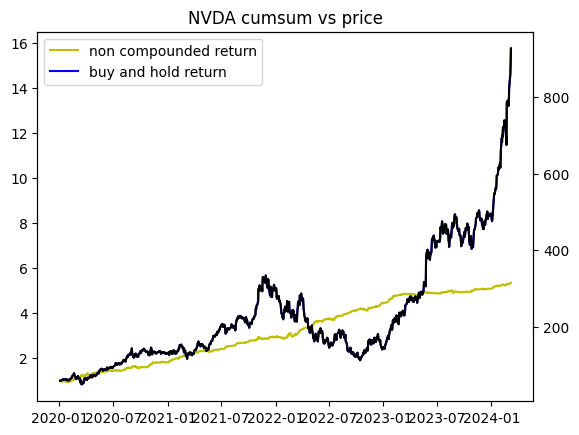

NVDA
total strong buy trend days:  30
total reverse sell days:  337
total reverse buy days:  243
total strong sell trend days:  21
-------------------------------
total trading days:  1051
total win days:  369
total lose days:  250
total no-action days:  432
winrate:  59.61 %


,Open,High,Low,Close,Adj Close,Volume,typical,PT,AH,NH,NL,AL,signal,comment,result,daily_profit,buy_and_hold,mdd,comp_ret,non_comp_ret
Date,,,,,,,,,,,,,,,,,,,,
2024-01-02,492.440002,492.950012,475.950012,481.679993,481.657410,41125400,494.480003,17.000000,511.480003,513.009995,496.009995,477.480003,1,reverse buy,4.925485,1.020,8.195321,-0.001,50.677645,5.105
2024-01-03,474.850006,481.839996,473.200012,475.690002,475.667694,32089600,483.065002,8.639984,491.704987,492.929993,484.290009,474.425018,1,reverse buy,4.921477,0.996,8.093407,-0.015,50.474935,5.101
2024-01-04,477.670013,485.000000,475.079987,479.980011,479.957489,30653500,476.605003,9.920013,486.525017,478.130020,468.210007,466.684990,2,nothing,4.921477,1.000,8.166397,0.000,50.474935,5.101
2024-01-05,484.619995,495.470001,483.059998,490.970001,490.946960,41456800,480.010002,12.410004,492.420006,476.960007,464.550003,467.599998,3,reverse sell,4.932417,1.011,8.353381,-0.003,51.030159,5.112
2024-01-08,495.119995,522.750000,494.790009,522.530029,522.505493,64251000,490.117500,27.959991,518.077492,485.444992,457.485001,462.157509,3,reverse sell,4.984060,1.053,8.890345,-0.001,53.734758,5.165
2024-01-09,524.010010,543.250000,516.900024,531.400024,531.375122,77310000,515.650017,26.349976,541.999992,514.400009,488.050034,489.300041,3,reverse sell,4.995989,1.012,9.041259,-0.014,54.379575,5.177
2024-01-10,536.159973,546.000000,534.890015,543.500000,543.474487,53379600,530.737518,11.109985,541.847504,526.585022,515.475037,519.627533,3,reverse sell,5.007917,1.012,9.247129,-0.002,55.032130,5.189
2024-01-11,549.989990,553.460022,535.599976,548.219971,548.194275,59675900,541.972504,17.860046,559.832550,548.345032,530.484985,524.112457,3,reverse sell,5.002905,0.995,9.327434,-0.026,54.756969,5.184
2024-01-12,546.200012,549.700012,543.299988,547.099976,547.074341,35247900,546.374985,6.400024,552.775009,549.449982,543.049957,539.974960,2,nothing,5.002905,1.000,9.308379,0.000,54.756969,5.184


In [40]:
a = cdp_backtest(show_table = False, ticker="NVDA", debug=False, show_backtest=True, fee=0.002, start = "2020-01-01", hold_time = 1)
ytd = a.iloc[-46:, :]
past_year = a.iloc[-296:-46, :]
four_year = a


In [ ]:
ytd[]